# Correlation Exercises

In [1]:
import pandas as pd
import numpy as np

from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import env

import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-danger" role="alert">
    <div class="row vertical-align">
        <div class="col-xs-1 text-center">
            <i class="fa fa-exclamation-triangle fa-2x"></i>
        </div>
        <div class="col-xs-11">
                <strong>Be sure to import .gitignore prior to pushing env.py</strong>
</div>

1. Answer with the type of stats test you would use (assume normal distribution):
- Is there a relationship between the length of your arm and the length of your foot?
- Do guys and gals quit their jobs at the same rate?
- Does the length of time of the lecture correlate with a students grade?

2. Use the telco_churn data.
- Does tenure correlate with monthly charges?
- Total charges?
- What happens if you control for phone and internet service?

3. Use the employees database.
- Is there a relationship between how long an employee has been with the company and their salary?
- Is there a relationship between how long an employee has been with the company and the number of titles they have had?

4. Use the sleepstudy data.
- Is there a relationship between days and reaction time?

<hr style="border:2px solid gray">

### #1. Answer with the type of stats test you would use (assume normal distribution):

<b> Is there a relationship between the length of your arm and the length of your foot?</b>

- Variable 1: length of arm (continuous)
- Variable 2: length of foot (continuous)
- Use: Pearson's r or Spearman's

<b> Do guys and gals quit their jobs at the same rate?</b>

- Variable 1: Guys/Girls
- Variable 2: Quit Rate
- Independent T-Test: 2 tailed

<b> Does the length of time of the lecture correlate with a students grade?</b>

- Variable 1: length of lecture (continuous)
- Variable 2: student's grade (continuous)
- Use: Pearson's R or Spearman's

<hr style="border:2px solid black">

### #2. Use the telco_churn data.

In [2]:
def get_db_url(username, password, host,db):
    return f'mysql+pymysql://{username}:{password}@{host}/{db}'    

In [3]:
url= get_db_url(env.username, env.password, env.host, db='telco_churn')

In [4]:
query = 'SELECT * FROM customers'

In [5]:
df = pd.read_sql(query, url)

<div class="alert alert-block alert-info">
<b>Hint:</b> 
<br>
    
Another way to read in telco data is to save it to a csv and bring it in.
<br>
df = pd.read_csv('telco_normalized.csv')
    </div>

In [6]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

<b>Does tenure correlate with monthly charges?</b>

<div class="alert alert-block alert-success">
<b>Step-by-Step:</b>
    <br>
    <br> 
- Step 1: State our hypothesis, set alpha value
        <br>
- Step 2: Select the data, run .info
        <br>
- Step 3: Plot the data
        <br>
- Step 4: Test for assumputions: Is there normality?
        <br>
- Step 5: Run stats test
        <br>
- Step 6: Draw Conclusions 
</div>

<b>Step 1</b>: 
- $H_0$: There is no linear correlation between tenure and monthly charges
- $H_a$: There is a linear correlation between tenure and monthly charges

In [8]:
#set alpha
α = 0.05

<b>Step 2</b>:

In [9]:
charges_df= df[['monthly_charges', 'tenure']]

In [10]:
charges_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   monthly_charges  7043 non-null   float64
 1   tenure           7043 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 110.2 KB


<b>Step 3:</b>

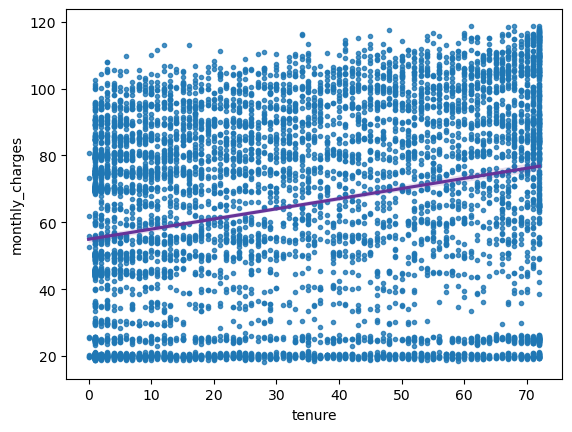

In [11]:
sns.regplot(x= 'tenure', y= 'monthly_charges', data= charges_df, marker='.' , line_kws={'color': 'rebeccapurple'})
plt.show()

<div class="alert alert-block alert-info">
<b>Hint:</b> 
if there is variable that corresponds with time- put that on the "x-axis"
</div>

<b>Step 4:</b> 

<AxesSubplot:>

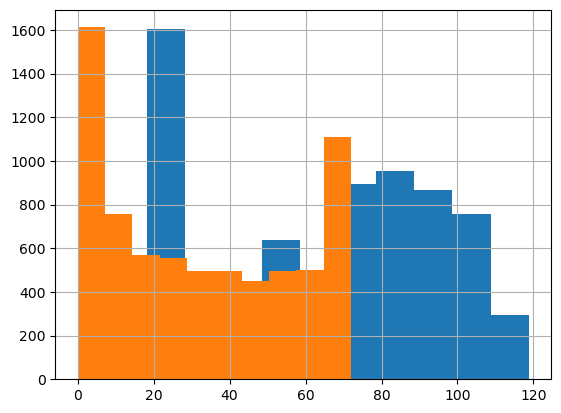

In [12]:
charges_df.monthly_charges.hist()
charges_df.tenure.hist()

<b>Step 5:</b>

In [13]:
r,p = stats.spearmanr(charges_df.tenure, charges_df.monthly_charges)
r,p

(0.27641678933130215, 1.0271266876409408e-123)

<b>Step 6:</b>

In [14]:
def eval_result(α,p):
    if p < α:
        return print(f'Reject the null hypothesis, there is a linear correlation (p-value: {p})')
    else:
        return print(f'We fail to reject the null hypothesis that there is a linear correlation \
        (p-value: {p})')

In [15]:
eval_result(α,p)

Reject the null hypothesis, there is a linear correlation (p-value: 1.0271266876409408e-123)


<b>Takeaways:</b>
<br>
There is a correlation between monthly charges and tenure.
<br>
With an r of .28, the correlation is weak-moderate.

<hr style="border:1px solid black">

<b>Total charges?</b>

<div class="alert alert-block alert-success">
<b>Step-by-Step:</b>
    <br>
    <br> 
- Step 1: State our hypothesis, set alpha value
        <br>
- Step 2: Select the data, run .info
        <br>
- Step 3: Plot the data
        <br>
- Step 4: Test for assumputions: Is there normality?
        <br>
- Step 5: Run stats test
        <br>
- Step 6: Draw Conclusions 
</div>

<b>Step 1:</b>
- $H_0$: There is no linear correlation between tenure and total charges
- $H_a$: There is a linear correlation between tenure and total charges

In [16]:
α = 0.05

<b>Step 2:</b>

In [17]:
ttl_charges_df = df[['tenure', 'total_charges']]

In [18]:
ttl_charges_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tenure         7043 non-null   int64 
 1   total_charges  7043 non-null   object
dtypes: int64(1), object(1)
memory usage: 110.2+ KB


<div class="alert alert-block alert-info">
<b>Hint:</b> 
use '.sort_values()'' to see if you have any "weird" values that need to be converted.
    <br>
    (ex) ttl_charges_df.total_charges.sort_values()
</div>

In [19]:
#covert empty space into '0'
ttl_charges_df['total_charges']= ttl_charges_df['total_charges'].str.replace(' ', '0').astype('float')

In [20]:
#confirm data types were changed
ttl_charges_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tenure         7043 non-null   int64  
 1   total_charges  7043 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 110.2 KB


<b>Step 3:</b>

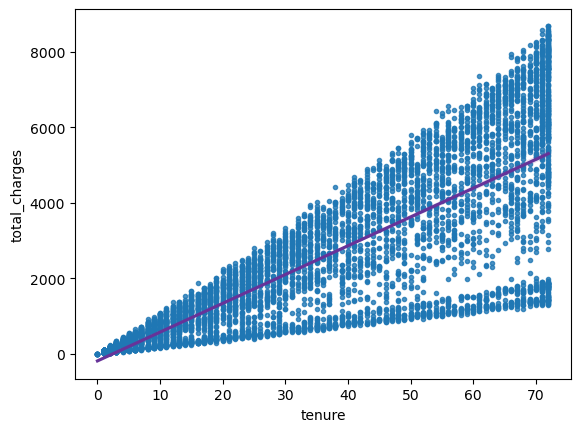

In [21]:
sns.regplot(x= 'tenure', y= 'total_charges', data= ttl_charges_df, marker='.' , line_kws={'color': 'rebeccapurple'})
plt.show()

<b>Step 4:</b>

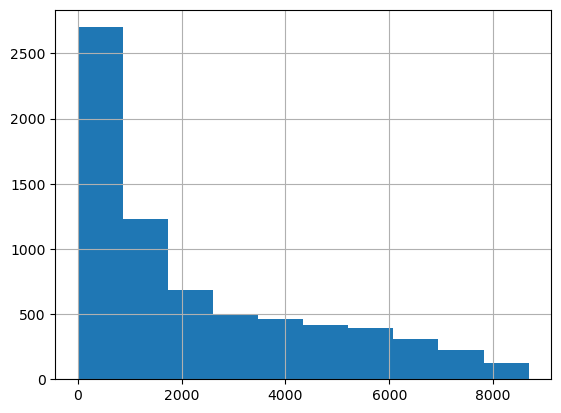

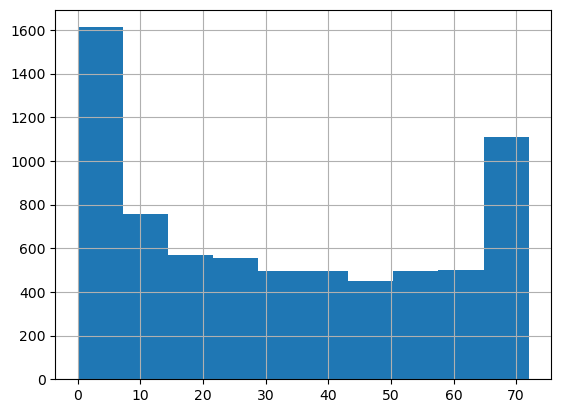

In [22]:
ttl_charges_df.total_charges.hist()
plt.show()

ttl_charges_df.tenure.hist()
plt.show()

Because these are not normally distributed, we will use a spearman's test

<b>Step 5:</b>

In [23]:
r,p = stats.spearmanr(ttl_charges_df.tenure,ttl_charges_df.total_charges)
r, p

(0.8896957900597577, 0.0)

<b>Step 6:</b>

In [24]:
eval_result(α,p)

Reject the null hypothesis, there is a linear correlation (p-value: 0.0)


<b>Takeaway</b>: 
<br>
There is a linear correlation between tenure and total charges
<br>
With an r of .89, the correlation is strong.

<hr style="border:1px solid black">

<b>C. What happens if you control for phone and internet service?</b>

Let's look customers who have phone service and no internet

<div class="alert alert-block alert-success">
<b>Step-by-Step:</b>
    <br>
    <br> 
- Step 1: State our hypothesis, set alpha value
        <br>
- Step 2: Select the data, run .info
        <br>
- Step 3: Plot the data
        <br>
- Step 4: Test for assumputions: Is there normality?
        <br>
- Step 5: Run stats test
        <br>
- Step 6: Draw Conclusions 
</div>

<b>Step 1:</b>

Of customers who have only phone service:
<br>
- $H_0$: There is no linear correlation between tenure and monthly charges
- $H_a$: There is a linear correlation between tenure and monthly charges

In [25]:
α = 0.05

<b>Step 2:</b>

In [26]:
#select the data 
phone_df= df[(df.phone_service == 'Yes') & (df.internet_service_type_id == 1)][['tenure','monthly_charges']]

In [27]:
#this shows we have no missing values and data types are correct
phone_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1739 entries, 0 to 7041
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tenure           1739 non-null   int64  
 1   monthly_charges  1739 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 40.8 KB


<b>Step 3:</b>

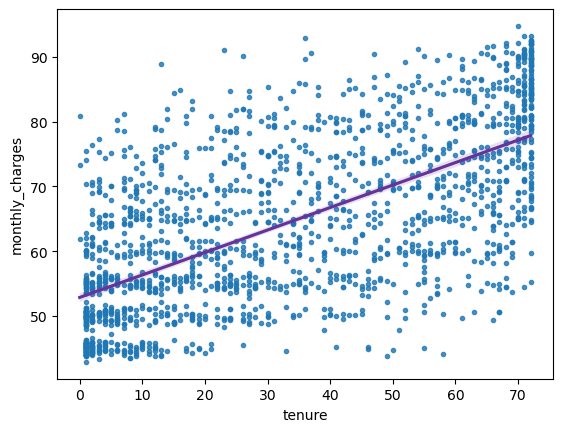

In [28]:
sns.regplot( x='tenure', y= 'monthly_charges',data= phone_df, marker='.' , line_kws={'color': 'rebeccapurple'})
plt.show()

<b>Step 4:</b>

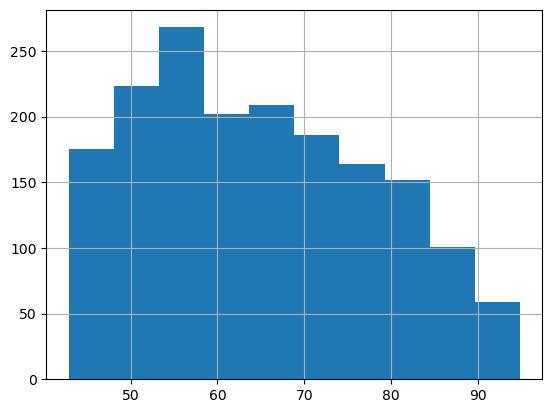

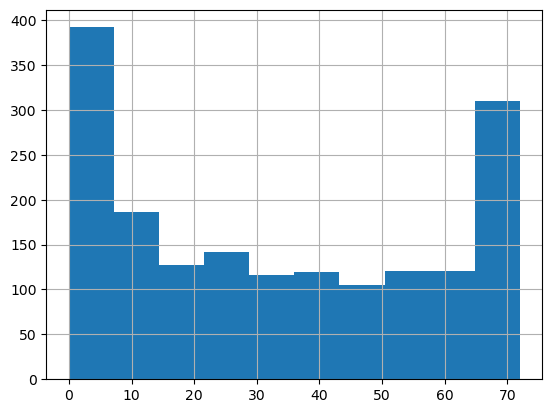

In [29]:
phone_df.monthly_charges.hist()
plt.show()

phone_df.tenure.hist()
plt.show()

We will use Spearman's test due to violation of assumption of normality

<b>Step 5:</b>

In [30]:
r,p= stats.spearmanr(phone_df.tenure, phone_df.monthly_charges)
r,p

(0.6644708508462759, 5.423601644635052e-222)

<b>Step 6:</b>

In [31]:
eval_result(α,p)
print(f'r value = {r}')

Reject the null hypothesis, there is a linear correlation (p-value: 5.423601644635052e-222)
r value = 0.6644708508462759


<b>Takeaways</b>:
<br>
There is a moderate-strong correaltion between tenure and monthly charges for customers who have only phone service.

<hr style="border:2px solid black">

### #3. Use the employees database.

<b>Bring in the data</b>

In [32]:
#bring in data from sql
url= get_db_url(env.username, env.password, env.host, db='employees')

In [33]:
#set sql query
query = '''
        select * 
        from employees
            join salaries
                using (emp_no)
        where to_date > now()
        '''

In [34]:
#read in sql query
df = pd.read_sql(query, url)

In [35]:
#what data do we have
df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01


In [36]:
#take a look at the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      240124 non-null  int64 
 1   birth_date  240124 non-null  object
 2   first_name  240124 non-null  object
 3   last_name   240124 non-null  object
 4   gender      240124 non-null  object
 5   hire_date   240124 non-null  object
 6   salary      240124 non-null  int64 
 7   from_date   240124 non-null  object
 8   to_date     240124 non-null  object
dtypes: int64(2), object(7)
memory usage: 16.5+ MB


There is a pretty weak correlation, even though we rejected the null hypothesis

<hr style="border:1px solid black">

<b>A. Is there a relationship between how long an employee has been with the company and their salary?</b>

<div class="alert alert-block alert-success">
<b>Step-by-Step:</b>
    <br>
    <br> 
- Step 1: State our hypothesis, set alpha value
        <br>
- Step 2: Select the data, run .info
        <br>
- Step 3: Plot the data
        <br>
- Step 4: Test for assumputions: Is there normality?
        <br>
- Step 5: Run stats test
        <br>
- Step 6: Draw Conclusions 
</div>

<b>Step 1:</b>
- $H_0$: There is no linear correlation between tenure and monthly charges
- $H_a$: There is a linear correlation between tenure and monthly charges

In [37]:
α = 0.05

<b>Step 2</b>:

In [38]:
#subtract dates to get tenure
(df.to_date - df.hire_date)

0         2926512 days, 0:00:00
1         2926729 days, 0:00:00
2         2926449 days, 0:00:00
3         2926354 days, 0:00:00
4         2925338 days, 0:00:00
                  ...          
240119    2924120 days, 0:00:00
240120    2924958 days, 0:00:00
240121    2926578 days, 0:00:00
240122    2923846 days, 0:00:00
240123    2922337 days, 0:00:00
Length: 240124, dtype: object

In [39]:
#reformat tenure to int so it's useable
df['tenure'] = (df.to_date - df.hire_date).astype(str).str.split(' ', expand=True)[0]

In [40]:
df.tenure = df.tenure.astype(int)

In [41]:
#create the dataframe with the info we want
tenure_df = df[['tenure', 'salary']]

In [42]:
tenure_df.head()

,tenure,salary
0,2926512,88958
1,2926729,72527
2,2926449,43311
3,2926354,74057
4,2925338,94692


<b>Step 3</b>:

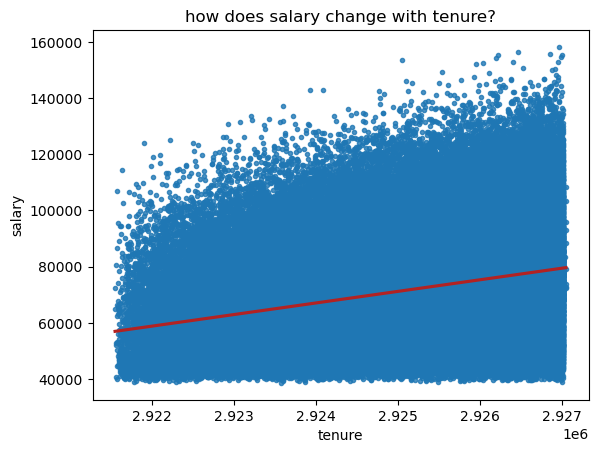

In [43]:
#plot relationships
sns.regplot(data=tenure_df, x='tenure', y='salary', marker='.', line_kws=({'color': 'firebrick'}))

plt.title('how does salary change with tenure?')
plt.show()

<b>Step 4</b>:

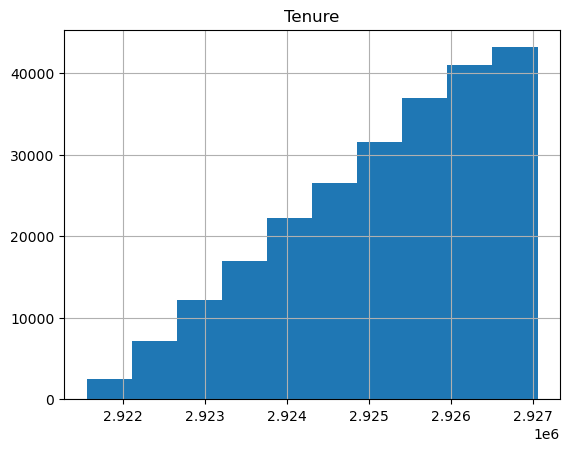

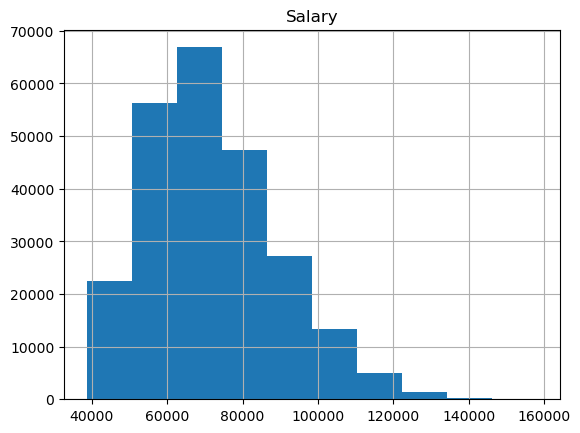

In [44]:
tenure_df.tenure.hist()
plt.title('Tenure')
plt.show()

tenure_df.salary.hist()
plt.title('Salary')
plt.show()

Distributions are not normal, so we will use Spearmans test

<b>Step 5</b>:

In [45]:
#calculate r and p
r, p = stats.spearmanr(tenure_df.tenure, tenure_df.salary)
r, p

(0.3128783525010577, 0.0)

<b>Step 6</b>:

In [46]:
eval_result(α,p)
print(f'r value = {r}')

Reject the null hypothesis, there is a linear correlation (p-value: 0.0)
r value = 0.3128783525010577


<b>Takeaways</b>:
<br>
We reject the null hypothesis. There is a moderate correlation between tenure and salary.  

<hr style="border:1px solid black">

<b>B. Is there a relationship between how long an employee has been with the company and the number of titles they have had?</b>

<div class="alert alert-block alert-success">
<b>Step-by-Step:</b>
    <br>
    <br> 
- Step 1: State our hypothesis, set alpha value
        <br>
- Step 2: Select the data, run .info
        <br>
- Step 3: Plot the data
        <br>
- Step 4: Test for assumputions: Is there normality?
        <br>
- Step 5: Run stats test
        <br>
- Step 6: Draw Conclusions 
</div>

<b>Step 1</b>:
- $H_0$: There is no linear correlation between tenure and number of titles 
- $H_a$: There is a linear correlation between tenure and number of titles

In [47]:
α = 0.05

<b>Step 2</b>:

In [54]:
#bring in data from sql
url= get_db_url(env.username, env.password, env.host, db='employees')

#set sql query
query = '''
select t.emp_no, count(t.title) AS num_titles, te.tenure
from titles t
join (select emp_no, datediff(now(), min(from_date)) AS tenure 
from titles
group by emp_no
having max(to_date) = '9999-01-01'
) te using(emp_no)
group by t.emp_no;        
'''

In [55]:
#read in sql query
df = pd.read_sql(query, url)

In [56]:
df.head()

,emp_no,num_titles,tenure
0,10001,1,13311
1,10002,1,9620
2,10003,1,9864
3,10004,2,13153
4,10005,2,12137


In [57]:
df = df[['num_titles', 'tenure']]

In [58]:
df.head()

,num_titles,tenure
0,1,13311
1,1,9620
2,1,9864
3,2,13153
4,2,12137


<b>Step 3</b>:

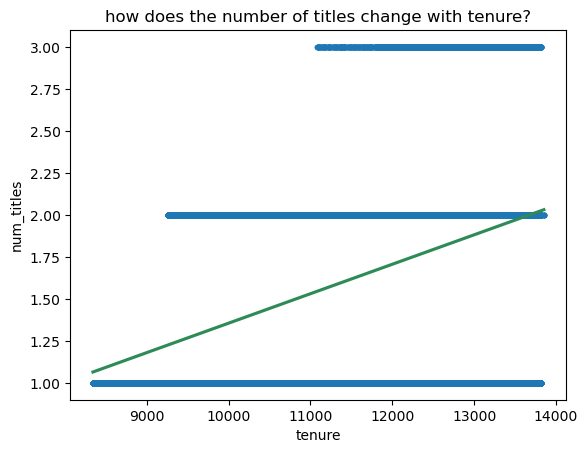

In [64]:
#plot relationships
sns.regplot(data=df, x='tenure', y='num_titles', marker='.', line_kws=({'color': 'seagreen'}))

plt.title('how does the number of titles change with tenure?')
plt.show()

Because the number of titles is a discrete value, we should run an ANOVA or a kruskal Wallis test to test whether the average salary of those with 1 title is different from those with 2, or 2 different from 3, etc

<b>Step 4</b>:

Assumptions:
<br>
- do we have equal variance?
    <br>
- are there enough observations?
    <br>
- are they independent of each other?

In [62]:
#check for equal variance
stats.levene(df.num_titles, df.tenure)

LeveneResult(statistic=718602.1569097865, pvalue=0.0)

In [61]:
df.num_titles.value_counts()

2    125345
1    111892
3      2887
Name: num_titles, dtype: int64

<b>Step 5</b>:

In [63]:
stats.kruskal(df.num_titles, df.tenure)

KruskalResult(statistic=371488.64419334417, pvalue=0.0)

The variances are significantly different; therefore we will use the Kruskal Wallis test.

<b>Step 6</b>:

<b>Takeaway</b>: 
<br>
There is a difference in tenure and number of titles an employee holds.

<hr style="border:2px solid black">

### #4. Use the sleepstudy data.

In [70]:
from pydataset import data

In [71]:
sleep_df = data('sleepstudy')

In [72]:
sleep_df.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


<div class="alert alert-block alert-success">
<b>Step-by-Step:</b>
    <br>
    <br> 
- Step 1: State our hypothesis, set alpha value
        <br>
- Step 2: Select the data, run .info
        <br>
- Step 3: Plot the data
        <br>
- Step 4: Test for assumputions: Is there normality?
        <br>
- Step 5: Run stats test
        <br>
- Step 6: Draw Conclusions 
</div>

<b>Is there a relationship between days and reaction time?</b>

<b>Step 1</b>:
- $H_0$: There is no linear correlation between days and reaction time
- $H_a$: There is a linear correlation between days and reaction time

In [73]:
α = 0.05

<b>Step 2</b>:

In [74]:
react_df = df[['Reaction' ,'Days']]

In [75]:
react_df.head()

,Reaction,Days
1,249.5600,0
2,258.7047,1
3,250.8006,2
4,321.4398,3
5,356.8519,4


<b>Step 3</b>:

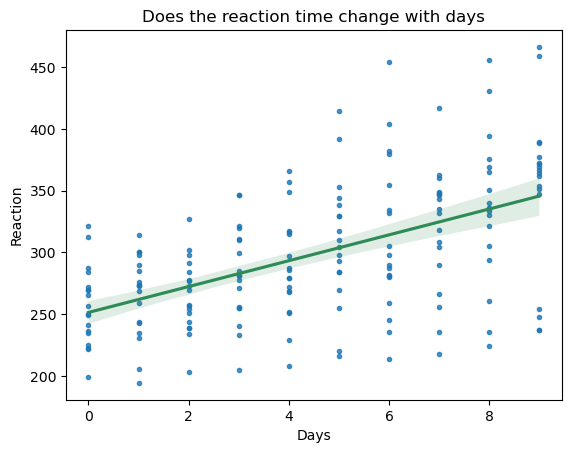

In [77]:
#plot relationships
sns.regplot(data=react_df, x='Days', y='Reaction', marker='.', line_kws=({'color': 'seagreen'}))

plt.title('Does the reaction time change with days')
plt.show()

<b>Step 4</b>:

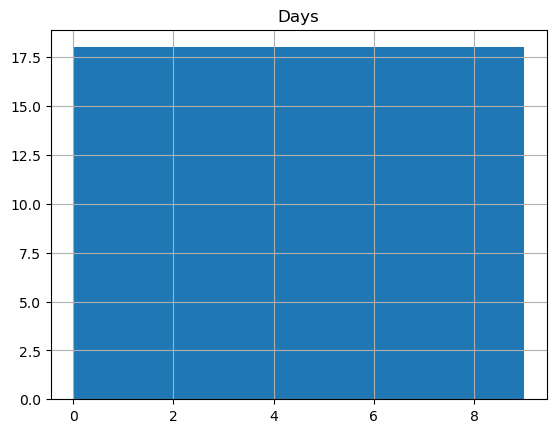

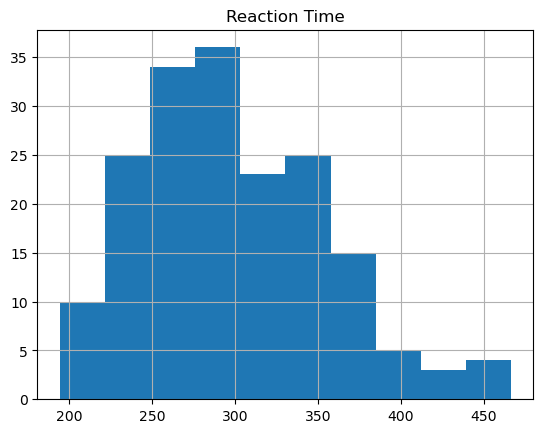

In [78]:
react_df.Days.hist()
plt.title('Days')
plt.show()

react_df.Reaction.hist()
plt.title('Reaction Time')
plt.show()

- Days is uniformly distributions 
- Reaction time is normally distributed

<b>Step 5</b>:

In [79]:
r,p= stats.spearmanr(react_df.Days, react_df.Reaction)
r,p

(0.5228138502259547, 5.132878057706873e-14)

<b>Step 6</b>:

In [80]:
eval_result(α,p)
print('r value: ', r)

Reject the null hypothesis, there is a linear correlation (p-value: 5.132878057706873e-14)
r value:  0.5228138502259547


<b>Takeaway</b>:
    <br>
    There is a moderate correlation between days and reaction time